In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
class Bandit:
    def __init__(self, m, upper_limit=0):
        self.mean = upper_limit
        self.m = m
        self.N = 0
        
    def pull(self):
        return self.m + np.random.randn()
    
    def update_mean(self, X_N):
        self.N += 1
        self.mean = (1 - 1./self.N)*self.mean + 1./self.N*X_N
        
        

###Pseudo code for optimistic initial values###


#define epsilon
eps = 0.05

m1 = 1
B1 = Bandit(m1)

m2 = 3
B2 = Bandit(m2)

m3 = 5
B3 = Bandit(m3)

list_of_bandits = [B1, B2, B3]
max_mean = np.max([bandit.mean for bandit in list_of_bandits])
best_bandit = [bandit for bandit in list_of_bandits if bandit.mean == max_mean]

selected_bandit = best_bandit[-1]
#pull randomly selected bandit
pull_value = selected_bandit.pull()

#update bandit mean
selected_bandit.update(pull_value)

if selected_bandit.mean > max_mean:
     max_mean = selected_bandit.mean
     best_bandit.append(selected_bandit)
    
    
    
    


In [3]:
m1 = 1
m2 = 2
m3 = 3

In [12]:
#define number of trials
N = 100000

#define upper_limit
upper_limit = 10

#define eps
eps = 0.1

#define list of m
list_of_m = [m1, m2, m3]

In [5]:
def run_experiment(list_of_m, upper_limit, N):
    
    list_of_bandits = [Bandit(m, upper_limit) for m in list_of_m]
    list_of_selected_bandits = []
    pulled_data = np.empty(N)
    
    for i in range(0, N):
        
        best_bandit_arg = np.argmax([bandit.mean for bandit in list_of_bandits])
        selected_bandit = list_of_bandits[best_bandit_arg]

        #pull randomly selected bandit
        pulled_value = selected_bandit.pull()

        #update bandit mean
        selected_bandit.update_mean(pulled_value)
        
        #store pulled data
        pulled_data[i] = pulled_value
        
        #update list of selected bandits
        list_of_selected_bandits.append(selected_bandit)


        
    cumulative_average = np.cumsum(pulled_data) / (np.arange(N) + 1)
    
    return list_of_selected_bandits, cumulative_average


In [6]:
list_of_selected_bandits, cumulative_average = run_experiment(list_of_m, upper_limit, N)

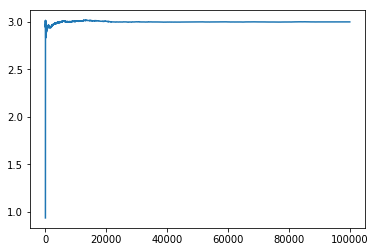

In [7]:
plt.plot(cumulative_average)

In [8]:
def run_experiment_exp(list_of_m, eps, N):
    
    list_of_bandits = [Bandit(m) for m in list_of_m]
    list_of_selected_bandits = []
    pulled_data = np.empty(N)
    
    for i in range(0, N):

        #pulling random uniform number
        p = np.random.random()

        if p < eps:
            #select random bandit
            selected_bandit = np.random.choice(list_of_bandits)
        else:
            #select current best bandit
            best_bandit_arg = np.argmax([bandit.mean for bandit in list_of_bandits])
            selected_bandit = list_of_bandits[best_bandit_arg]

        #pull randomly selected bandit
        pulled_value = selected_bandit.pull()

        #update bandit mean
        selected_bandit.update_mean(pulled_value)
        
        #store pulled data
        pulled_data[i] = pulled_value
        
        #update list of selected bandits
        list_of_selected_bandits.append(selected_bandit)

        
    cumulative_average = np.cumsum(pulled_data) / (np.arange(N) + 1)
    
    return list_of_selected_bandits, cumulative_average


In [10]:
list_of_selected_bandits_exp, cumulative_average_exp = run_experiment_exp(list_of_m, eps, N)

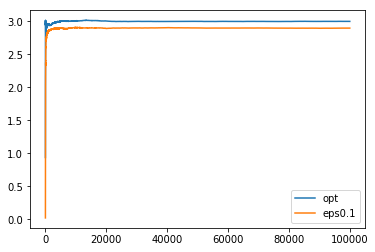

In [11]:
plt.plot(cumulative_average, label = "opt")
plt.plot(cumulative_average_exp, label = "eps0.1")
plt.legend()